In [58]:
import numpy as np 
from ploting_tools import plot_hull, plot_sea
import matplotlib.pyplot as plt


Para calcular la fuerza de empuje resultante necesitamos por lo tanto calcular el area (volumen) de la porción del casco sumergida. El problema consta de dos subproblemas: 

- Encontrar la región sumergida para cada posición y orientación del casco ( y, theta ) 

- Calcular el área de una región dada. 

## Cálculo de la región sumergida

Lo más cómodo es asumir que el nivel del mar es constante en $y=0$, con lo cual sólo tenemos que obtener la región:
$$H_\mathrm{sub}\coloneqq\left\{(x,y)\in H \,\text{tal que}\,y\le 0\right\}$$

In [59]:
def close_region(points, N=20):
    P = points[-1, :]
    Q = points[ 0, :]
    closing_points = P + np.outer(np.linspace(0,1,N),(Q - P))
    return np.concatenate([points,closing_points])

def move_hull(points, dy):
    points[:,1] += dy
    return points 



    



def under_region(points, y_sea=0.):
    x, y = points[:,0], points[:,1]
    h_wet = points[ y <= y_sea]
    return  close_region(h_wet)
    

## Cálculo del area de una región simple

### Teorema de Green
Para calcular el área podemos aprovecharnos del [teorema de Green](https://es.wikipedia.org/wiki/Teorema_de_Green) 
$$
\oint_C  \mathbf{F}\cdot\mathrm{d}\mathbf{\ell} =\iint_S \left(\frac{\partial F_y}{\partial x}-\frac{\partial F_x}{\partial y}\right)\,\mathrm{d}S
$$


Basta con elegir $\mathbf{F}$ tal que $\frac{\partial F_y}{\partial x}-\frac{\partial F_x}{\partial y}=1$ y tendremos que:
$$
\mathrm{Area}\left(S\right)=\oint_C  \mathbf{F}\cdot\mathrm{d}\mathbf{\ell}
$$

Una opción es coger $\mathbf{F}\left(x,y\right)=-\frac{y}{2}\mathbf{i}+\frac{x}{2}\mathbf{j}$

In [60]:
import numpy as np 



def compute_area(points, open=False):
    x, y = points 
    F_x = -y/2
    F_y =  x/2

    dx = np.diff(x)
    dy = np.diff(y)

    A = np.sum( F_x[1:] * dx + F_y[1:] * dy)

    return np.abs(A)

# Test with a circle
R = 1 
N = 100 
th = np.linspace(0,2*np.pi,N)

x = - R * np.sin(th)
y =   R * np.cos(th)
points = (x,y)
print(f'{compute_area(points) : .2f}, should be: {np.pi*R**2 : .2f}')

# Test with an ellipse
a = 3
b = 4 
N = 100 
th = np.linspace(0,2*np.pi,N)

x = a * np.cos(th)
y = b * np.sin(th)
points = (x,y)
print(f'{compute_area(points) : .2f}, should be: {np.pi*a*b : .2f}')



 3.14, should be:  3.14
 37.67, should be:  37.70


In [61]:
# Test with a circle
R = 1 
N = 200 
theta = np.linspace(0,2*np.pi,N)
points = np.array([[-R*np.sin(th), R*np.cos(th)] for th in theta])

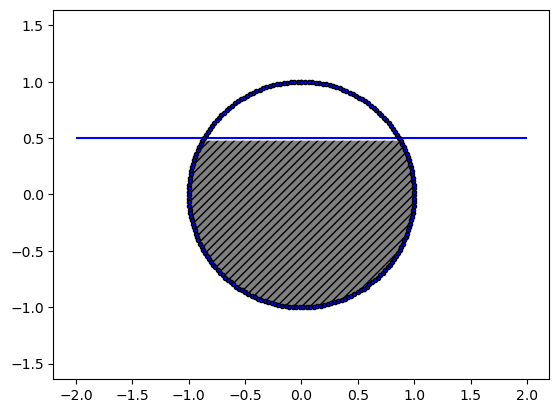

In [62]:
h = 0.5

fig, ax = plt.subplots()
plot_sea(h, ax)
plot_hull(points, under_region=under_region(points,h),ax=ax)

ax.axis('equal')
plt.show()
